## Introduction

# Part 1
The full name of K-NN is k-NearestNeighbor. The k-NN algorithm means that if most of the k nearest neighbors of a sample in the feature space belong to a certain category, the sample also belongs to this category and has the characteristics of the samples in this category.

The distance calculation of the KNN algorithm is to calculate the distance between the predicted point and all points, then save and sort, and select the first K values to see which categories are more numerous. The calculation formula in a two-dimensional array is:
$$d=\sqrt{\left(x_2-x_1\right)^2+\left(y_2-y_1\right)^2}$$
* where $(x_1,y_1)$is the data point we want to classify.







Our goal in this project is to implement k-NN algorithm.
The main steps are
1. Calculate the distance between a point in a dataset of known classes and the current point.
2. Sort the points in order of increasing distance.
3. Select the k points with the smallest distance from the predicted point.
4. Determine the frequency of occurrence of the label where the k points are located.
5. Return the label with the highest frequency in the first k points as the predicted classification of the current point.

# Part 2
Also, we want to investigate performance of the k-Nearest Neighbors algorithm in classification of images in the MNIST database. The MNIST database is a collection of 60,000 images of handwritten digits from 0 through 9. Each image in the MNIST dataset consists of 28 x 28 pixels.

## Part 1

In [326]:
import numpy as np

First, we define a function SortData that calculates the distance between the points in the dataset and the predicted points, and sort the points in increasing order by distance

In [327]:
def SortData(training_data, x):
    #Use the Euclidean distance formula to get the distance of each point to the predicted point
    training_dataSize = training_data.shape[0]
    diffMat = np.tile(x, (training_dataSize, 1)) - training_data
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5
    sortedDistIndices = distances.argsort()
    return sortedDistIndices

The function knn selects the n points with the smallest distance from the current point, and determine the frequency of occurrence of the label of this point. Finally, the label with the highest frequency of the n points is returned as the predicted label of the predicted point, and the row number of the n points is returned.

In [328]:
def knn(training_data, training_labels, x, n):
    
    appear_times = {}
    lists=[]
    votelabel=[]
    
    for i in range(n):
        votelabel.append(training_labels[SortData(training_data,x)[i]])
        #Record the closest n points
        lists.append(SortData(training_data,x)[i])
        
    #Count the number of times each label appears
    for label in votelabel:
        if label in appear_times:
            appear_times[label] += 1
        else:
            appear_times[label] = 1
    mostNum = max(appear_times, key=lambda x: appear_times[x])


    return [mostNum,lists]

## Part 2

The file "train-images-idx3-ubyte.gz" contains images of digits

In [329]:
import gzip
with gzip.open("train-images-idx3-ubyte.gz",'rb') as foo:
    #read binary data which is the training_data in knn()
    f = foo.read()

Here, we expand the 28 x 28 pixels into a one-dimensional row vector, and these row vectors are the rows in the image array (784 values per row, or each row represents an image).

In [330]:
images = np.array([b for b in f[16:]]) .reshape(-1,28*28)

In [331]:
img = images[19].reshape(28,28)

In [332]:
#Example of one of images
with np.printoptions(linewidth=5*28):
    print(img)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  18 105 227 253 253 122   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  57 199 253 252 252 252 252 15

The file "train-labels-idx1-ubyte.gz" contains the corresponding labels

In [333]:
with gzip.open("train-labels-idx1-ubyte.gz",'rb') as foo:
    f=foo.read()

In [334]:
labels = np.array([b for b in f[8:]])

Use function knn to select the 10 points with the smallest distance from the current point to get the predicted value

In [335]:
#Test one of images
print(labels[18])
knn(images,labels,images[18],9)

6


[6, [18, 27724, 32312, 38782, 47808, 16346, 57846, 32402, 34918]]

Repeatedly use knn() to classify more images and plot them. 

Also I will compare predicted and exact images

In [336]:
import matplotlib.pyplot as plt

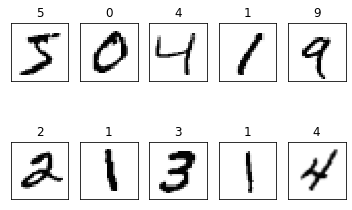

In [337]:
#Create plots to show more images
fig, ax = plt.subplots(
    nrows=2,
    ncols=5,
    sharex=True,
    sharey=True, )
ax = ax.flatten()
for i in range(0,10):
    img = images[i].reshape(28,28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    plt.imshow(img, cmap="Greys")
    
    KNN=knn(images,labels,images[i],15)[0]
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title(KNN)

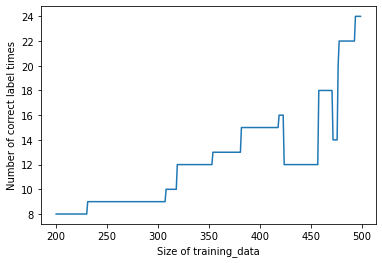

In [338]:
total=[]
for i in range(100,400):
    imges=images[0:100+i]
    px=[]
    ac=[]
    account=0
    account2=0
    for a in range(2,30):
        px.append(knn(imges,labels,imges[5],a)[0])
    for i in range(0,28):
        if px[i]==2:
            account += 1
    total.append(account)

x=np.arange(0,300)
plt.plot(x+200,total,ls="-")
plt.xlabel('Size of training_data')
plt.ylabel('Number of correct label times')
plt.show()

As shown in the figure, when the training set size is between 200-500 and the number of neighbors is fixed at 30, the accuracy is the lowest at 200-230. Accuracy is highest at 500. Although the slope of the line varies greatly, the overall trend is upward. So when the number of neighbors is small, the larger the size of the training set, the higher the accuracy becomes.

In addition to the Euclidean distance formula($d=\sqrt{\left(x_2-x_1\right)^2+\left(y_2-y_1\right)^2}$) I used in part1, there is also the Manhattan distance formula($p=\left|x_2-x_1\right|+\left|y_2-y_1\right|$)

In [339]:
#Use the Manhattan distance formula to calculate the distance between points
def SortDataM(training_data, x):
    training_dataSize = training_data.shape[0]
    diffMat = np.tile(x, (training_dataSize, 1)) - training_data
    sqDiffMat = abs(diffMat)
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances
    sortedDistIndices = distances.argsort()
    return sortedDistIndices

In [340]:
#Take the Manhattan distance formula into the knn algorithm
def knnM(training_data, training_labels, x, n):
    appear_times = {}
    classCount = {}
    lists=[]
    votelabel=[]
    for i in range(n):
        votelabel.append(training_labels[SortDataM(training_data,x)[i]])
        lists.append(SortDataM(training_data,x)[i])
    for label in votelabel:
        if label in appear_times:
            appear_times[label] += 1
        else:
            appear_times[label] = 1
    most_common = max(appear_times, key=lambda x: appear_times[x])


    return [most_common,lists]

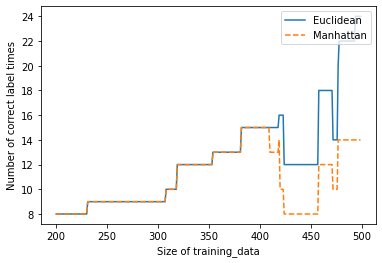

In [341]:
total=[]
total2=[]
for i in range(100,400):
    imges=images[0:100+i]
    px=[]
    px2=[]
    ac=[]
    ac2=[]
    account=0
    account2=0
    for a in range(2,30):
        px.append(knn(imges,labels,imges[5],a)[0])
        px2.append(knnM(imges,labels,imges[5],a)[0])
    for i in range(0,28):
        if px[i]==2:
            account += 1
        if px2[i]==2:
            account2 +=1
    total.append(account)
    total2.append(account2)
x=np.arange(0,300)
plt.plot(x+200,total,ls="-",label="Euclidean")
plt.plot(x+200,total2,ls = "--",label="Manhattan")
plt.legend(loc="upper right")
plt.xlabel('Size of training_data')
plt.ylabel('Number of correct label times')
plt.show()

Drawing a graph to compare two different formulas, I found that when the dataset is below 400, the Manhattan distance formula and Euclidean distance formula are equally accurate, when the dataset becomes larger, the M-distance formula is not as accurate as the E-distance formula. When the data set becomes larger, because not all distances obtained by the M-distance formula are shortest paths, it is more likely to give a higher distance value than the Euclidean distance, so the accuracy becomes lower.

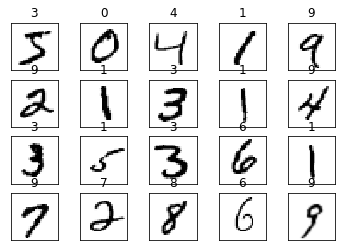

In [342]:
imag=images[0:100]
fig, ax = plt.subplots(
    nrows=4,
    ncols=5,
    sharex=True,
    sharey=True, )
ax = ax.flatten()
for i in range(0,20):
    img = images[i].reshape(28,28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    plt.imshow(img, cmap="Greys")
    
    KNN=knn(imag,labels,imag[i],15)[0]
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title(KNN)

In this example, as shown in the figure, the images No. 1, 6, 10, 12, 16 and 17 are not correctly classified. Because I reduced the size of the data set to 100 rows, there are no more accurate samples around for classification, so the label of the prediction point is not accurate.The images shows that the numbers 2 and 5 are most often confused with other numbers.